In [1]:
import torch
import numpy as np
from torchvision.models.detection import retinanet_resnet50_fpn_v2, RetinaNet_ResNet50_FPN_V2_Weights
from PIL import Image, ExifTags
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [2]:
device = torch.device('cuda:0')
model=retinanet_resnet50_fpn_v2(weights=RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT).to(device)
preprocess=RetinaNet_ResNet50_FPN_V2_Weights.DEFAULT.transforms().to(device)
model.eval()
image=img=Image.open('/run/media/amol447/54B63A3EB63A2142/Abha_mobile_backup/IMG_4900.PNG')


True

In [5]:
img_processed=preprocess(image).to(torch.device('cuda:0'))
with torch.no_grad():
    predictions=model([img_processed])


In [14]:
temp=(predictions[0]['scores']>0.5) & (predictions[0]['labels']==1)
print(predictions[0]['boxes'][temp])

tensor([[  41.4963,  471.7210,  741.4624, 1311.5981],
        [ 512.2415,  177.1755,  704.0344,  433.7711],
        [   0.0000,  509.4908,  264.9233, 1140.4574]], device='cuda:0')


In [13]:
predictions[0]['labels'][temp]


tensor([ 1,  1, 34,  1], device='cuda:0')

In [8]:
from torchvision.utils import draw_bounding_boxes


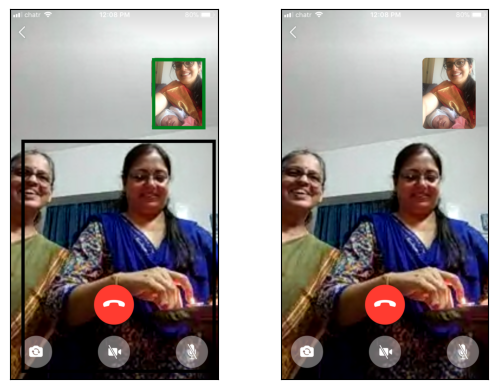

In [15]:
img_with_boxes=draw_bounding_boxes(img_processed,predictions[0]['boxes'][temp][0:2],width=12)
show([img_with_boxes,img_processed])

In [11]:
predictions[0]['scores']

tensor([0.8690, 0.7830, 0.5149, 0.5102, 0.2861, 0.2566, 0.2266, 0.2202, 0.2151,
        0.2117, 0.2004, 0.1980, 0.1668, 0.1372, 0.1347, 0.1316, 0.1286, 0.1241,
        0.1151, 0.1143, 0.1125, 0.1042, 0.1022, 0.1004, 0.0996, 0.0984, 0.0983,
        0.0957, 0.0954, 0.0948, 0.0934, 0.0933, 0.0929, 0.0920, 0.0881, 0.0871,
        0.0867, 0.0858, 0.0828, 0.0811, 0.0807, 0.0799, 0.0787, 0.0786, 0.0781,
        0.0779, 0.0764, 0.0753, 0.0750, 0.0745, 0.0729, 0.0725, 0.0723, 0.0715,
        0.0710, 0.0700, 0.0695, 0.0692, 0.0681, 0.0681, 0.0680, 0.0673, 0.0672,
        0.0671, 0.0670, 0.0666, 0.0664, 0.0653, 0.0642, 0.0627, 0.0626, 0.0625,
        0.0618, 0.0615, 0.0613, 0.0601, 0.0600, 0.0597, 0.0591, 0.0580, 0.0579,
        0.0573, 0.0573, 0.0571, 0.0571, 0.0565, 0.0563, 0.0557, 0.0555, 0.0552,
        0.0552, 0.0548, 0.0541, 0.0532, 0.0531, 0.0529, 0.0528, 0.0522, 0.0513,
        0.0513, 0.0511, 0.0507, 0.0506, 0.0505, 0.0502, 0.0502],
       device='cuda:0')

In [17]:
exif

{'ResolutionUnit': 2,
 'ExifOffset': 192,
 'Make': 'Apple',
 'Model': 'iPhone 6s',
 'Software': '10.2',
 'Orientation': 6,
 'DateTime': '2017:01:28 12:50:14',
 'YCbCrPositioning': 1,
 'XResolution': 72.0,
 'YResolution': 72.0,
 'ExifVersion': b'0221',
 'ComponentsConfiguration': b'\x01\x02\x03\x00',
 'ShutterSpeedValue': 7.8892251815980625,
 'DateTimeOriginal': '2017:01:28 12:50:14',
 'DateTimeDigitized': '2017:01:28 12:50:14',
 'ApertureValue': 2.2750071245369052,
 'BrightnessValue': 7.457401812688822,
 'ExposureBiasValue': 0.0,
 'MeteringMode': 5,
 'Flash': 24,
 'FocalLength': 2.65,
 'ColorSpace': 1,
 'ExifImageWidth': 2576,
 'FocalLengthIn35mmFilm': 31,
 'SceneCaptureType': 0,
 'ExifImageHeight': 1932,
 'SubsecTimeOriginal': '451',
 'SubsecTimeDigitized': '451',
 'SensingMethod': 2,
 'ExposureTime': 0.004219409282700422,
 'FNumber': 2.2,
 'SceneType': b'\x01',
 'ExposureProgram': 2,
 'CustomRendered': 4,
 'ISOSpeedRatings': 32,
 'ExposureMode': 0,
 'FlashPixVersion': b'0100',
 'Whit